In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})

plt.style.use(['seaborn-v0_8-colorblind'])

In [39]:
dataset_names = {
    "adult": "Adult",
    "huga": "HuGaDB",
    "kdd": "KDD99",
    "spambase": "Spambase",
}

model_names = {
    "fedfor": r"{\tt FedFor}",
    "fedlr": r"{\tt FedLR}",
}

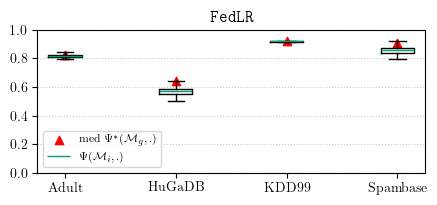

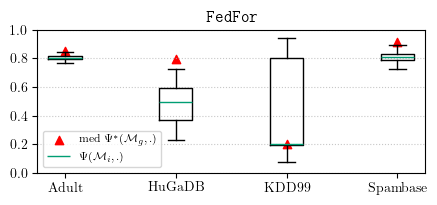

In [41]:
n_clients = 50
comm_cost = 0.0125

for model in ("fedlr", "fedfor"):

    local_accs = []
    global_accs = []

    datasets = list(dataset_names.keys())

    for dataset in datasets:

        dft = pd.read_csv(
            f"history/{n_clients}_clients_{dataset}_{model}.csv"
        )

        local_accs.append( 
            dft[[f"Client {i} Accuracy" for i in range(1, n_clients + 1)]].to_numpy().reshape(-1)
        )

        global_accs.append( 
            np.median(dft["Global Accuracy"].to_numpy())
        )
    
    plt.figure(figsize=(4.5, 2))
    plt.scatter(np.arange(len(datasets))*2.0, global_accs, marker='^', color='red', label=r'med $\Psi^{*}(\mathcal{M}_g,.)$', alpha=1.)
    plt.boxplot(local_accs, positions=np.arange(len(datasets))*2.0, widths=0.6, label=r'$\Psi(\mathcal{M}_i,.)$', showfliers=False)
    plt.xticks(np.arange(len(datasets))*2.0, [dataset_names[d] for d in datasets])
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.legend(fontsize=8, loc='lower left')
    plt.tight_layout()
    plt.title(model_names[model])
    plt.savefig(f"final/{model}_boxplot.pdf", dpi=300)
    plt.show()
    # plt.xlabel("Dataset")
    # plt.ylabel("Accuracy")